# ANALISIS DE ETL Y EDA - ARCHVIO REVIEW YELP
Este es el estudio de uno de los archivos que se particiono de los 6 GB, tamaño de 350000 lineas esta en formato "CSV".

Tambien se van a listar las librerias que vamos a utilizar a lo largo del estudio.

In [1]:
import os
import ast
import json
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import warnings
import datetime

Cargamos el primer archivo "revnew0.csv" para comenzar el estudio. Y vamos a utilizar metodos y funciones para su analisis, viendo cada uno de las columnas, sus tipos de datos y si posee datos nulos, faltantes o duplicado.
Asi cargaremos los 19 archivos, y luego los uniremos, para crear uno solo.


In [2]:
df_rev1 = pd.read_csv("../Carpeta_ETL/revyelp_concatYELP.csv")
df_rev1.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,fecha_correcta
0,194087,F6VdYuJiefNBfn3HNELv0A,s4sR0rvVOf6iby77xGeyLg,z7em5co2qckbAXoDGXynsA,5,0,0,0,The food is INCREDIBLE! We didn't have time to...,2019-01-04,False
1,194089,nAMDCKElSKxOhzm9Lpt6Eg,SRp90x9d2719GOZ_PT-a6A,M0r9lUn2gLFYgIwIfG8-bQ,5,0,0,0,"We had a great time, and excellent service. Al...",2019-01-06,False
2,204271,uObbDRxP_cwJVADckZJDZw,jAgaHj1hc7z34PRWPEPEhQ,WLiqfxv_GhFFA5sm878a2w,5,0,0,0,Delicious! Tried this place on Saturday and it...,2019-02-11,False
3,204275,_Lq1_yzoOBDzjwPVWszdAg,F8wJVQrOppgOwSXU08mTdA,720J1v3TX-J95cdTJbCpKA,5,0,0,1,Love this place! Took out of state company her...,2019-02-20,False
4,205291,sW6Q_tsqcbFzmxVi7nFbqg,sqV9r9DVcgvK6waZzMFhmg,uJpN56lqw1o5dleSueXdow,5,0,0,0,"Literally, the best yet in the Indiana, Tennes...",2019-02-03,False


Voy a eliminar las columnas que estan de mas, y que no me dan datos para el estudio.
que serian (Unnamed: 0, fecha_correcta).

In [5]:
df_rev1.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date', 'fecha_correcta'],
      dtype='object')

In [6]:
df_rev1.drop(['Unnamed: 0','fecha_correcta'], axis=1, inplace=True)

In [8]:
# Vamos a ver los tipos de datos de cada columnas y ademas voy a ver la cantidad de nulos
df_rev1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003705 entries, 0 to 1003704
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   review_id    1003705 non-null  object
 1   user_id      1003705 non-null  object
 2   business_id  1003705 non-null  object
 3   stars        1003705 non-null  int64 
 4   useful       1003705 non-null  int64 
 5   funny        1003705 non-null  int64 
 6   cool         1003705 non-null  int64 
 7   text         1003705 non-null  object
 8   date         1003705 non-null  object
dtypes: int64(4), object(5)
memory usage: 68.9+ MB


Vemos la cantidad de duplicado para la columna que puede ser mi indice principal o clave primaria. Si es igual a cero, se puede decir que es una muy buena clave (Ya que la clave primaria tiene que ser unica para cada registro).

Tambien analizaremos si "user_id" y "business_id", tiene duplicados ya que estas serian claves foraneas a otras entidades.

In [9]:
num_duplicados1 = df_rev1['review_id'].duplicated().sum()
print(f"Total de duplicados en review_id: {num_duplicados1}")

Total de duplicados en review_id: 0


In [10]:
num_duplicados2 = df_rev1['user_id'].duplicated().sum()
print(f"Total de duplicados en user_id: {num_duplicados2}")

Total de duplicados en user_id: 537981


In [11]:
num_duplicados3 = df_rev1['business_id'].duplicated().sum()
print(f"Total de duplicados en business_id: {num_duplicados3}")


Total de duplicados en business_id: 947618


In [12]:
df_rev1.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

Con el metodo "isnull().sum()", puedo ver que no hay campos que posean datos nulos. ya que todas las columnas me dan cero.

Ahora vamos a analizar cual es el promedio de "stars" que tiene cada negocio y ademas vamos a hacer un estudio de estrellas desde 1 al 5, y ver cual es la cantidad de cada unas.

In [13]:
promedioStars =df_rev1['stars'].mean()
print("El promedio de las estrellas de todos los negocios es: ", promedioStars)

El promedio de las estrellas de todos los negocios es:  3.848043996991148


C:\Users\Esteban\AppData\Local\Temp\ipykernel_2984\1726326897.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo_estrellas.index, y=conteo_estrellas.values, palette='viridis')


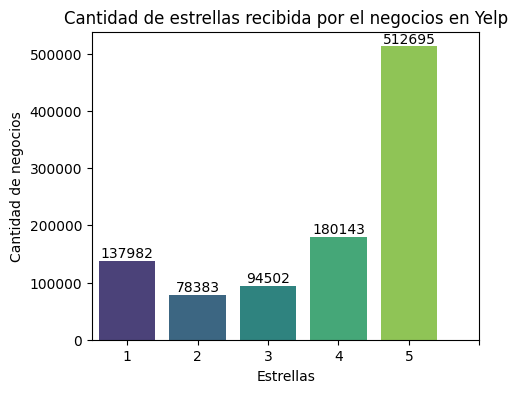

In [15]:
# Contar cuántos negocios tienen cada número de estrellas
conteo_estrellas = df_rev1['stars'].value_counts().sort_index()
plt.figure(figsize=(5, 4))
ax = sns.barplot(x=conteo_estrellas.index, y=conteo_estrellas.values, palette='viridis')
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
    
# Visualizacion de la grafica
plt.title('Cantidad de estrellas recibida por el negocios en Yelp')
plt.xlabel('Estrellas')
plt.ylabel('Cantidad de negocios')
plt.xticks(range(0, 6))
plt.show()

De la grafica anterior nos esta diciendo que la mayoria de los negocios estan bien categorizados ya que poseen entre 4 y 5 estrellas.
y el promdio de estrellas es de 3,8.

In [18]:
df_rev1['date'] = pd.to_datetime(df_rev1['date'])
# Mostrar la columna 'date' en formato 'YYYY-MM-DD'
df_rev1['date'] = df_rev1['date'].dt.strftime('%Y-%m-%d')
# Verifica el formato de la columna 'date'
#print(df_rev1[['date']].head())

In [ ]:
df_filtrado=df_rev1
# Asegúrate de convertir la columna 'date' a formato datetime
df_filtrado['date'] = pd.to_datetime(df_filtrado['date'], errors='coerce')

# Ahora puedes extraer el año
df_filtrado['year'] = df_filtrado['date'].dt.year

# Filtrar los 5 años más frecuentes
mejores_5_años = df_filtrado['year'].value_counts().nlargest(5).index

# Crear el DataFrame filtrado con los 5 años más frecuentes
df_top5 = df_filtrado[df_filtrado['year'].isin(mejores_5_años)]

# Gráfico de barras apiladas (Stacked bar chart)
plt.figure(figsize=(10, 6))
df_filtrado.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Reacciones positivas por año (Mejores 5 años)')
plt.xlabel('Año')
plt.ylabel('Total de reacciones')
plt.xticks(rotation=45)
plt.legend(title='Reacciones')
plt.show()

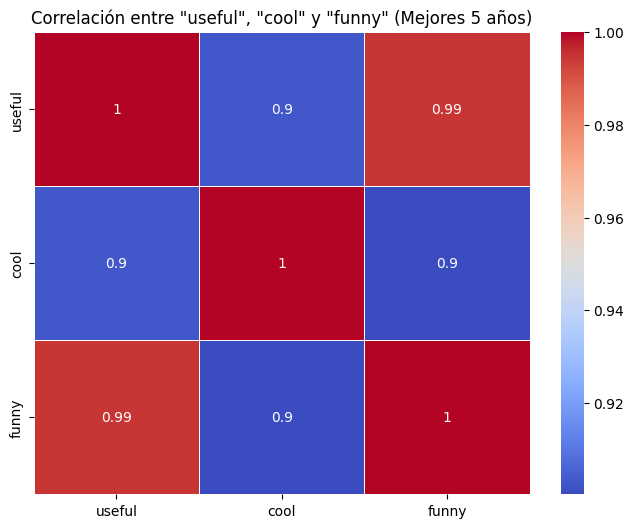

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_grouped.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación entre "useful", "cool" y "funny" (Mejores 5 años)')
plt.show()

In [34]:
import re
palabrasBusc = ['Restaurant', 'Pizza', 'Food', 'American', 'Meal', 'Hot Dog', 
            'meat Burguer', 'Italian', 'Korean', 'Japanese', 'Sushi', 
            'Mexican', 'chiken', 'lunch', 'branch', 'dinner', 'food']
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
# Unir las palabras en una sola expresión regular, ignorando mayúsculas/minúsculas
# \b asegura que solo coincidan palabras completas
palregex = r'\b(?:' + '|'.join(palabrasBusc) + r')\b'

# Filtrar las filas donde la columna 'text' contenga alguna de las palabras
df_filtered = df_rev1[df_rev1['text'].str.contains(palregex, flags=re.IGNORECASE, regex=True)]

# Mostrar las primeras filas filtradas
print(df_filtered[['text']].head())
cant=len(df_filtered[['text']])

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            text
0            If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or

In [35]:
cant=len(df_filtered[['text']])
print(cant)

185445


In [36]:
df_filtered[['date']].head()
df_revyear=df_filtered

In [43]:
df_revyear.shape

(185445, 10)

In [39]:

df_revyear.to_csv("../Carpeta_ETL/reviewYELP3_csv.csv")

In [35]:
from wordcloud import WordCloud


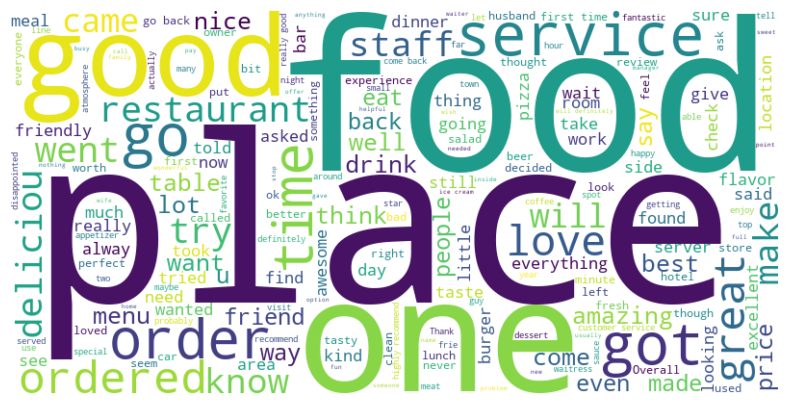

In [36]:
# Verificar que la columna 'text' exista y que su tipo de dato sea object (cadenas de texto)
if 'text' in df_rev1.columns and df_rev1['text'].dtype == 'object':
    # Unir todo el texto en una sola cadena
    texto_total = " ".join(review for review in df_rev1['text'])

    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_total)

    # Mostrar la nube de palabras utilizando matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Ocultar los ejes
    plt.show()
else:
    print("No se encontró la columna 'text' o no es del tipo object.")